# Tutoriel - Génération de données synthétiques en santé

## Sommaire 
1. [Introduction](#1-introduction)  
    A. [Que sont les données synthétiques  ? ](#a-que-sont-les-données-synthétiques)  
    B. [Contexte juridique   ](#b-contexte-juridique)  
    C. [A quoi peuvent-elles servir ?  ](#c-a-quoi-peuvent-elles-servir)  
    D. [Comment en générer ?](#d-comment-en-générer)  
2. [Présentation théorique des méthodes de génération ](#2-présentation-théorique-des-méthodes-de-génération)   
    A. [Génération structurelle  ](#a-génération-structurelle)  
    B. [Avatarisation  ](#b-avatarisation)  
    C. [Méthodes de deep learning  ](#c-deep-learning)  
3. [Mise en pratique et comparaison  ](#3-mise-en-pratique-et-comparaison)  
    A. [Importation du jeu de données de référence et des 3 jeux synthétiques  ](#a-importation-du-jeu-de-données-de-référence-et-des-3-jeux-synthétiques)  
    B. [Conservation de l'utilité  ](#b-conservation-de-lutilité)  
    C. [Evaluation de la confidentialité](#c-évaluation-de-la-confidentialité)  
4. [Conclusion  ](#conclusion)
5. [Bibliographie](#bibliographie)

## 1. Introduction

### A. Que sont les données synthétiques ? 

On appelle "données synthétiques" ou "données de synthèse" toutes données générées à l'aide d'un modèle cherchant à reproduire des caractéristiques structurelles et/ou statistiques de données réelles.
Elles concernent tous types de données : tabulaire, imagerie, séries temporelles, signaux biologiques, ... 
Les modèles à l'origine des données synthétiques peuvent être de natures et de complexités diverses, allant du tirage aléatoire au modèle d'apprentissage automatique ou d'apprentissage profond.

### B. Contexte juridique 

L'utilisation de données synthétiques se justifie dans un contexte où l'accès aux données réelles (pour soi-même ou pour des partenaires à qui l'on souhaiterait partager un jeu de données) est compliqué, notamment d'un point de vue juridique.   
Le cas des données de santé est particulièrement représentatif de cette situation : en France (loi Informatique et libertés 1978), et plus généralement en Europe (RGPD 2018), les données de santé sont des données personnelles sensibles, et leur traitement doit être réalisé dans un cadre juridique et sécuritaire strict.
Bien qu'elles ne soient pas réelles, les données synthétiques ne peuvent pas être considérées anonymes par défaut (par exemple, si elles sont issues d'un modèle d'apprentissage automatique entraîné sur les données réelles, ce modèle peut contenir des données personnelles). Certains types [d'attaques](https://pubmed.ncbi.nlm.nih.gov/34920126/) [(14)](#bibliographie) ont permis de ré-identifier des individus à partir de données synthétiques.   
Le caractère anonyme s'obtient en cas de satisfaction des trois critères [identifiés par le G29](https://www.cnil.fr/sites/default/files/atoms/files/wp216_fr.pdf), ou bien après une analyse de risque de réidentification concluant à un  niveau de risque suffisamment bas. Si un de ces énoncés est vérifié pour des données synthétiques, celles-ci ne sont plus considérées comme des données personnelles. Ces sujets sont notamment abordés dans les guides ([premier guide](https://www.health-data-hub.fr/sites/default/files/2022-09/20220831%20-%20Open%20data%20-%20Guide%20-%20Donn%C3%A9es%20anonymes%20en%20sant%C3%A9.pptx%20%281%29.pdf) et [second guide](https://www.health-data-hub.fr/sites/default/files/2022-09/Guide%20d%E2%80%99%C3%A9valuation%20du%20caract%C3%A8re%20anonyme%20d%E2%80%99un%20jeu%20de%20donn%C3%A9es%20v2%20%281%29.pdf)) produits par le Health Data Hub.     
Plus de détails sont disponibles dans les [publications de la CNIL](https://linc.cnil.fr/fr/donnees-synthetiques-dis-papa-comment-fait-les-donnees-12) sur les données synthétiques.

### C. A quoi peuvent-elles servir? 

L'intérêt des données synthétiques est multiple, selon les niveaux de similarité structurelle, de vraisemblance (au niveau de l'individu)  et de représentativité (statistique, au niveau de la population) des données générées :
1. Créer du contenu pédagogique sans avoir accès aux données réelles : 
    - dans le cadre d'une formation 
    - pour apprendre à manipuler les données     
    &rarr; c'est ici la similarité structurelle et une représentativité partielle qui nous intéressent
2. Préparer son accès à une base de données réelle (par exemple via la plateforme du Health Data Hub). Dans le cas de la santé en particulier, l'accès à ces données personnelles sensibles est régulé et peut prendre plusieurs mois, d'où l'intérêt de données synthétiques pour
    - apprendre à manipuler les données
    - écrire des scripts en avance   
    &rarr; c'est ici surtout la similarité structurelle qui nous intéresse
3. Évaluer la faisabilité d'une étude scientifique, ou bien extraire des ordres de grandeur (exemple : combien de personnes en France sont atteintes d'une pathologie donnée ?)   
    &rarr; c'est ici la représentativité qui nous intéresse
4. Évaluer l'intérêt d'une base de données pour une étude scientifique (exemple: y a-t-il suffisamment de patients atteints d'une pathologie donnée pour réaliser une étude statistique ?)   
&rarr; c'est ici la représentativité qui nous intéresse
5. Réaliser une étude scientifique intégralement sur des données synthétiques. Sur ce dernier point, on pourra notamment citer :
    - [Azizi et al., Can synthetic data  be a proxy for real patient data? A validation study (BMJ, 2019)](https://bmjopen.bmj.com/content/11/4/e043497.abstract) (1)
    - [Benaim et al, Analyzing medical research results based on synthetic data and their relation to real data results (JMIR, 2020)](https://medinform.jmir.org/2020/2/e16492) (2)
    - [Foraker et al., Spot the difference: comparing results of analyses from real patient data and synthetic derivatives (JamiaOpen, 2020)](https://academic.oup.com/jamiaopen/article/3/4/557/6032922?login=false) (3)   
    &rarr; C'est ici à la fois la similarité structurelle, la vraisemblance et la représentativité qui nous intéressent
6. Partager les données à l'origine d'une étude scientifique (par exemple pour contribuer à la transparence scientifique)   
&rarr; C'est ici à la fois la similarité structurelle, la vraisemblance et la représentativité qui nous intéressent
7. Réutiliser une cohorte pour un usage secondaire, en partageant une cohorte synthétique plutôt que la cohorte réelle   
&rarr; C'est ici à la fois la similarité structurelle, la vraisemblance et la représentativité qui nous intéressent
8. Partager des données dans le cadre d'un hackathon ou d'un data challenge   
&rarr; C'est ici à la fois la similarité structurelle, la vraisemblance et la représentativité qui nous intéressent
9. Augmenter la taille d'une cohorte avec des données de synthèse   
&rarr; C'est ici à la fois la similarité structurelle, la vraisemblance et la représentativité qui nous intéressent

À noter que les cas d'usage 3 à 9 nécessitent d'avoir ponctuellement accès aux données réelles, ce qui n'est pas nécessairement vrai pour les cas d'usage 1 et 2. 

### D. Comment en générer? 

De nombreuses techniques de génération ont été développées, suivant la nature des données, les usages qui en sont faits et les contraintes juridiques inhérentes à l'utilisation de ces données synthétiques.

En effet, la plupart des cas d'usage des données synthétiques supposent que l'on cherche à protéger la confidentialité des données. On retrouve alors nécessairement l'arbitrage classique entre d'un côté **l'utilité** des données et le niveau de **confidentialité** qu'elles apportent.

![tradeoff](../static/img/tradeoff.png)

**Légende :** Arbitrage utilité-confidentialité (crédits: *Survey on privacy-preserving techniques for data publishing*)

Voici un florilège des techniques utilisées à des fins de génération de données synthétiques.     


*Techniques structurelles*

Ces techniques s'appuient uniquement sur le schéma formel des données, et quelques statistiques (essentiellement des moments d'ordre 1, comme la moyenne pour une variable d'âge, ou la proportion d'hommes et de femmes pour le sexe). Ces techniques sont l'objet de la partie 2A de ce notebook. A noter que, dans ce cas précis, les données générées sont anonymes (sous réserve que les statistiques élémentaires utilisées soient également anonymes).


*Techniques d'ajout de bruit*

Dans cette catégorie, on retrouve toute une variété de techniques probabilistes, allant de la modélisation bayésienne [(5)](#bibliographie) aux techniques de modélisation et *differential privacy* [(4)](#bibliographie). Ces techniques ont montré leur efficacité notamment pendant le challenge Hide-and-seek 2020 organisé par Neurips ([lien](https://www.vanderschaar-lab.com/privacy-challenge/)). A noter que, dans ce cas, les données ne sont pas nécessairement anonymes.

*Avatarisation*

Cette technique, développée par la jeune société Nantaise [Octopize](https://octopize-md.com/fr/) est expliquée dans la partie 2B de ce notebook. A noter que dans ce cas, les données synthétiques peuvent être considérées comme anonymes.


*Techniques de deep learning*


Ces techniques sont explorées dans la partie 2C de ce notebook. De façon générale, elles s'appuient sur des architectures d'autoencodeurs variationnels ou bien de GAN (*generative adversarial networks*, réseaux antagonistes génératifs, [(6)](#bibliographie)), voire une combinaison des deux. Parmi les implémentations connues, on peut citer medGAN [(7)](#bibliographie), utilisée pour reproduire des parcours patients aplatis, ou TimeGAN [(8)](#bibliographie), utilisée pour reproduire des parcours patients avec toute leur richesse séquentielle. A noter que, dans ce cas, les données ne sont pas anonymes a priori.


*Autres techniques*

De nombreuses autres méthodes ont été développées pour créer des données synthétiques, parmi lesquelles on peut citer : 
- les méthodes par arbre (voir, par exemple, le package R [synthpop](https://synthpop.org.uk)) ;
- les méthodes type réseau bayésien (voir, par exemple, [cet article](https://pubmed.ncbi.nlm.nih.gov/33367620/)) [(5)](#bibliographie).

## 2. Présentation théorique des méthodes de génération

### A. Génération structurelle

Dans cette partie, nous présentons la technique ayant permis de générer des données synthétiques à partir du schéma de la base de données considérée.   

La génération s'appuie sur [ce package](https://gitlab.com/healthdatahub/synthetic-generator), développé par le Health Data Hub, qui utilise le schéma formel de la base (liste des variables, types, contraintes éventuelles, schéma relationnel, règles métier élémentaires) pour générer de façon aléatoire une base de données synthétique.   
Il est à noter que les valeurs des variables sont ici tirées de façon uniforme univariée, par conséquent **les corrélations n'ont aucune valeur d'un point de vue médical** (à la différence des autres techniques de génération exposées dans les parties suivantes).  

Une telle base synthétique permet essentiellement de **découvrir le contenu** d'une base de données, de **produire du matériel pédagogique**, de **réaliser des tests techniques**, ou bien de **préparer des scripts** dans l'attente de l'accès à la base de données réelle. 

### B. Avatarisation

Dans cette partie, nous présentons la technique de génération de données de synthèse anonymes développée par Octopize.

#### Principe

La méthode Avatar utilise une approche **centrée sur l'individu**. Chaque observation originale génère une simulation stochastique locale conduisant à son avatar.
L'objectif de la méthode est de créer un avatar pour chaque individu afin de le protéger de la divulgation d'informations potentiellement identifiantes.

#### Étapes

En résumé, le cœur de la méthode Avatar suit trois grandes étapes.
- Input : les données d'entrée prennent la forme d'un ensemble de données tabulaires pseudonymisées.
- Le cœur de la méthode Avatar :  
        (a) Les observations individuelles sont projetées dans un espace multidimensionnel complet suivant un algorithme de décomposition en valeurs singulières.  
        (b) Les distances entre tous les individus sont calculées sur les premières dimensions de cet espace afin de trouver les $k$ plus proches voisins de chaque individu. L'espace défini par les voisins de chaque individu est ensuite utilisé pour définir une zone locale.  
        (c) Pour chaque individu, un avatar unique est généré de manière pseudo-stochastique dans cette zone locale. $k$, et d'autres paramètres déterminent le caractère aléatoire et le contenu informatif des simulations.  
        (d) Les propriétés de l'ensemble des données avatars sont évaluées en calculant des métriques de ré-identification et de rétention du signal.  
- Résultat : les avatars font l'objet de la transformation mathématique inverse de l'étape (a). Les coordonnées dans l'espace de projection sont transformées en valeurs dans l'espace original correspondant à l'ensemble de données initial. Enfin, les observations synthétiques sont mélangées pour supprimer définitivement le lien entre les individus originaux et les avatars.

Plus de détails sur le fonctionnement de la méthode sont disponibles [ici (16)](https://doi.org/10.1038/s41746-023-00771-5).

![method_avatar](../static/img/method_avatar.png)

**Légende**: (1) Données sensibles originales pseudonymisées. (2) L'avatarisation consiste en quatre étapes : (2a) les individus sont projetés dans un espace multidimensionnel ; (2b) les distances entre les individus sont calculées pour définir les $k$ plus proches voisins (ici $k=12$) dans un espace réduit ; (2c) un individu synthétique est généré de façon pseudo-aléatoire dans le sous-espace défini par les voisins ; (2d) les métriques de confidentialité et d'utilité sont calculées (3) Sortie de l'ensemble de données synthétiques.


### C. Deep learning

Dans cette partie, nous présentons les techniques permettant de générer des données synthétiques en utilisant le Deep Learning.   

Il s'agit de méthodes d'apprentissage non supervisé où l'entraînement va permettre au modèle de comprendre la structure des données d'origine. Une fois entraîné, le modèle peut générer de nouvelles données respectant la structure découverte lors de l'apprentissage.   
La majorité de ces techniques reposent sur l'utilisation de réseaux de neurones. Parmi elles, la méthode relativement récente des [GANs](https://arxiv.org/abs/1406.2661)[(6)](#bibliographie) ou réseaux antagonistes génératifs a ouvert le champ à l'utilisation du Deep Learning pour générer des données parfois totalement vraisemblables, c'est-à-dire des données difficiles à distinguer des données réelles par quelque manière que ce soit. On peut notamment citer l'exemple de [DALL-E](https://openai.com/dall-e-2/)[(9)](#bibliographie) pour la génération d'images et [GPT-3](https://openai.com/blog/gpt-3-apps/)[(10)](#bibliographie) ou encore [BLOOM](https://huggingface.co/bigscience/bloom)[(11)](#bibliographie) pour la génération de texte.   
Pour la génération de données tabulaires, plusieurs techniques reposant sur les GAN ont été développées, notamment la méthode [CT-GAN](https://arxiv.org/abs/1907.00503)[(12)](#bibliographie). 
Le principe reste similaire, deux réseaux de neurones sont placés en compétition: un générateur et un discriminateur. Le but du générateur est de produire des données synthétiques que le discriminateur ne peut pas différencier des données originales. Le discriminateur a l'objectif inverse en cherchant à différencier les données originales de celles générées par le générateur.   
Ces données ne sont pas anonymes a priori dans la mesure où il est possible que le réseau de neurones reproduise un ou plusieurs échantillon de la base de données réelle.    

![GAN](../static/img/GAN.png)

**Légende**: Présentation du concept de réseaux antagonistes génératifs (GAN), avec un réseau générateur (à gauche) et un réseau discriminateur (à droite)

Dans ce notebook, une [librairie](https://github.com/sdv-dev/CTGAN) implémentant la méthode CT-GAN a été utilisée pour produire un jeu de données synthétique.

## 3. Mise en pratique et comparaison

L'objectif de ce notebook est de comparer trois méthodes de génération de données synthétiques sur la base d'une évaluation commune.

- Méthode basée sur le schéma formel
- Avatarisation
- Méthode de deep learning

Un échantillon public [accessible à tous](https://physionet.org/content/mimiciii-demo/1.4/) issu du jeu de données MIMIC III est utilisé comme base commune à la génération de données de synthèse. Un ETL en [accès libre](https://github.com/MLforHealth/MIMIC_Extract) est utilisé pour faciliter l'extraction des données d'intérêt.
Les trois méthodes sont d'abord présentées individuellement puis comparées au regard du niveau de confidentialité qu'elles apportent et de l'utilité qu'elles préservent.

À noter que les données ont fait l'objet de traitements inspirés de la [littérature](https://www.nature.com/articles/s41598-022-11012-2) [(13)](#bibliographie) afin d'optimiser le calcul de métriques et de faciliter la comparaison des résultats. Ces fichiers de pre-processing sont disponibles sur ce dépôt.


### Pré-requis

In [1]:
from initiate import *
import pandas as pd
import numpy as np
import saiph
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# évaluation générique de l'utilité
from evaluation_functions.generic_signal_metrics.mutual_information import get_variation_information_matrix, get_variation_information_score, get_correlation_difference_ratio
from evaluation_functions.generic_signal_metrics.pmf_comparison import get_hellinger_distance, get_pmfs

from evaluation_functions.visualization_functions.plot_variable_metrics import plot_variable_metrics
from evaluation_functions.visualization_functions.plot_distributions import distribution_plot
from evaluation_functions.visualization_functions.plot_2d_projections import plot_2d_projections
from evaluation_functions.visualization_functions.plot_correlations import correlation_plot
from evaluation_functions.visualization_functions.color_palette import PRIMARY_GREEN, PRIMARY_CT_GAN, PRIMARY_STRUCT, DIVERGENT_STRUCT, DIVERGENT_CTGAN

# évaluation en prédiction
from evaluation_functions.specific_signal_metrics.mortality_prediction import get_mortality_prediction

# métriques génériques de confidentialité
from evaluation_functions.generic_privacy_metrics.dcr_nndr import get_distance_to_closest, get_closest_distances_ratio

# métriques de confidentialité spécifiques à l'avatarisation
from evaluation_functions.specific_privacy_metrics import PrivacyMetrics
from evaluation_functions.visualization_functions.plot_individual_travel import individual_travel_plot

### A. Importation du jeu de données de référence et des 3 jeux synthétiques

Trois jeux de données synthétiques ont été générés en utilisant les trois méthodes présentées ci-dessus. Un jeu de données original unique a servi de base à leur création et servira de référence pour leur comparaison.
La méthode de génération de données de synthèse utilisée dans ce notebook est définie comme suit:
- **structural**: schéma structurel
- **avatar**: avatarisation
- **ct-gan**: deep learning

In [2]:
original_csv = pd.read_csv('../data/original/original_for_comparison.csv')
struct_csv = pd.read_csv('../data/synthetic/structural_for_comparison.csv')
avatar_csv = pd.read_csv('../data/synthetic/avatar_for_comparison.csv')
ct_gan_csv = pd.read_csv('../data/synthetic/ctgan_data.csv')

original, struct, avatar, ct_gan = prepare_dtypes(original_csv, struct_csv, avatar_csv, ct_gan_csv)

In [3]:
# Aperçu du jeu de données original
original.head()

gender        age insurance     admittime diagnosis_at_admission  dischtime  \
0      F  70.637775  Medicare  6.147695e+09                 SEPSIS   7.204086   
1      F  36.192279   Private  4.942420e+09            HEPATITIS B   0.000000   
2      F  87.087423  Medicare  4.915295e+09                 SEPSIS  -0.000602   
3      F  73.687545  Medicare  5.661336e+09       HUMERAL FRACTURE   2.849109   
4      M  48.901451  Medicare  6.102075e+09    ALCOHOLIC HEPATITIS  -0.657685   

  discharge_location fullcode_first dnr_first fullcode  ... fullcode_first_?  \
0   HOME HEALTH CARE            1.0       0.0      1.0  ...            False   
1       DEAD/EXPIRED            1.0       0.0      1.0  ...            False   
2       DEAD/EXPIRED            1.0       0.0      1.0  ...            False   
3                SNF            1.0       0.0      1.0  ...            False   
4       DEAD/EXPIRED            1.0       0.0      1.0  ...            False   

   dnr_first_?  fullcode_?  dnr_? dnr_first_charttime_? timecmo_chart_?  \
0        False       False  False                  True            True   
1        False       False  False                  True            True   
2        False       False  False                 False            True   
3        False       False  False                  True            True   
4        False       False  False                 False           False   

   cmo_first_?  cmo_last_?  cmo_? deathtime_?  
0        False       False  False        True  
1        False       False  False       False  
2        False       False  False       False  
3        False       False  False        True  
4        False       False  False       False  

[5 rows x 192 columns]

In [4]:
# Affichage du typage des variables
original.dtypes

gender                     object
age                       float64
insurance                  object
admittime                 float64
diagnosis_at_admission     object
                           ...   
timecmo_chart_?            object
cmo_first_?                object
cmo_last_?                 object
cmo_?                      object
deathtime_?                object
Length: 192, dtype: object

### B. Conservation de l'utilité

L'un des aspects à vérifier pour évaluer la qualité d'un jeu de données synthétique est le niveau de conservation de l'utilité.
Pour de nombreux usages, notamment la recherche, la conservation des propriétés statistiques d'origine est une condition indispensable à l'utilisation de données synthétiques.
Dans ce notebook nous évaluerons l'utilité des trois jeux de données synthétiques en comparaison aux données originales.

Des métriques génériques seront d'abord calculées selon 3 axes:
- Unimodal (distribution)
- Bimodal (corrélation)
- Multimodal (projection)

Puis nous comparerons des métriques spécifiques au jeu de données MIMIC III.

À noter que l'ensemble des fonctions développées pour le calcul des métriques est accessible sur ce dépôt.

#### Comparaison des distributions

La comparaison de la distribution des données originales et des données synthétiques variable par variable offre un premier axe d'analyse pour évaluer la qualité d'un jeu de données synthétique.   
La distance de Hellinger est une distance au sens mathématique qui permet d'évaluer la différence entre deux distributions (originale et synthétique). Une distance de 0 indique une parfaite superposition des distributions (dans le cas gaussien, moyenne et variance égale) tandis qu'une distance de 1 indique que les deux distributions sont différentes.

In [5]:
# Cette cellule est l'unique cellule pouvant prendre plusieurs minutes dans ce notebook(<5) 

# Calcul des distances
values = compare_hellinger_distances(original, avatar=avatar,ct_gan=ct_gan, structural=struct)

# Calcul des statistiques
hellinger_statistics = get_hellinger_statistics(values, original=original, avatar=avatar, ct_gan=ct_gan, structural=struct)



 ########### result Avatar ########### 

The hellinger mean distance is 0.19849638064022468
The hellinger distance std is 0.21165806199546036
hellinger distance ratio < 0.1 0.484375
hellinger distance ratio < 0.2 0.6666666666666666
The variation of information score is 0.045056975610516914

 ########### result CT_GAN ########### 

The hellinger mean distance is 0.24421932475135164
The hellinger distance std is 0.24429765400746778
hellinger distance ratio < 0.1 0.4166666666666667
hellinger distance ratio < 0.2 0.6145833333333334
The variation of information score is 0.0510844218543678

 ########### result Structural ########### 

The hellinger mean distance is 0.430020644213438
The hellinger distance std is 0.27718390781904423
hellinger distance ratio < 0.1 0.19270833333333334
hellinger distance ratio < 0.2 0.24479166666666666
The variation of information score is 0.06318327810420132


Dans les résultats ci-dessus, la moyenne affichée est la moyenne des distances de Hellinger (calculées variable par variable). Idem pour l'écart-type.  

Les méthodes Avatar et CT-GAN génèrent des données plus proches de la répartition des données d'origine que la méthode de génération structurelle avec une distance moyenne de 0.19 pour Avatar et 0.24 pour CT-GAN contre 0.43 pour la méthode structurelle.   
On rappelle que plus la distance est proche de 0 plus les distributions sont semblables. 
Avec la méthode Avatar, 48% des 192 variables ont une distance de Hellinger inférieure à 0.1 avec les distributions originales contre 41% pour la méthode CT-GAN et 19% pour la méthode structurelle.   

On peut visualiser les distances de Hellinger par variable entre les données originales et les différentes données synthétiques avec le graphique ci-dessous.    
NB: La sélection d'un nombre de variables inférieur à 20 est conseillé pour faciliter la visualisation.

In [6]:
# Choix des variables à afficher
column_subset = original.columns[0:20]

# Génération du graphique
plot_hellingers(values, column_subset)

#### Comparaison des corrélations

Le maintien des distributions d'un jeu de données original constitue une bonne première étape à l'évaluation de l'utilité d'un jeu de données synthétiques. Les valeurs générées variable par variable doivent être cohérentes avec celles des données réelles.   
Toutefois, cette évaluation ne prend pas en compte les effets d'interaction qui peuvent exister entre les variables. 
Pour évaluer ces interactions, on peut dans un premier temps utiliser des mesures de corrélation. En comparant la matrice de corrélation issue des données originales à celle des données synthétiques, on peut évaluer la capacité des données de synthèse à conserver les relations bimodales entre les variables.   

Dans ce notebook nous avons utilisé la mesure du *coefficient de Pearson* permettant de calculer les corrélations entre les variables continues et la mesure de *variation of information* permettant d'évaluer les différences de relations entre données originales et synthétiques pour n'importe quel type de variable.   
Une *variation of information* de 0 indique une parfaite conservation des relations entre les variables tandis qu'une valeur de 1 indique que les relations sont différentes.   
À noter que la *variation of information* n'est pas linéaire de 0 à 1.

In [7]:
# Affichage des résultats de variation of information
hellinger_statistics[['method','variation_information']]

method  variation_information
0      Avatar               0.045057
1      CT_GAN               0.051084
2  Structural               0.063183

Sur ce cas d'usage, les relations entre les variables deux-à-deux sont en moyenne mieux conservées avec la méthode Avatar (0.045) qu'avec les méthodes CT-GAN (0.051) et structurelle. (0.063)

Pour illustrer et valider ces différences, on compare la matrice de corrélation de Pearson des données originales avec celles des données synthétiques.

la différence moyenne de corrélation entre le jeu de données original et les données structural est de 8.3713550600589%
la différence moyenne de corrélation entre le jeu de données original et les données avatars est de 5.915213016179684%
la différence moyenne de corrélation entre le jeu de données original et les données CT-GAN est de 8.71947785400075%


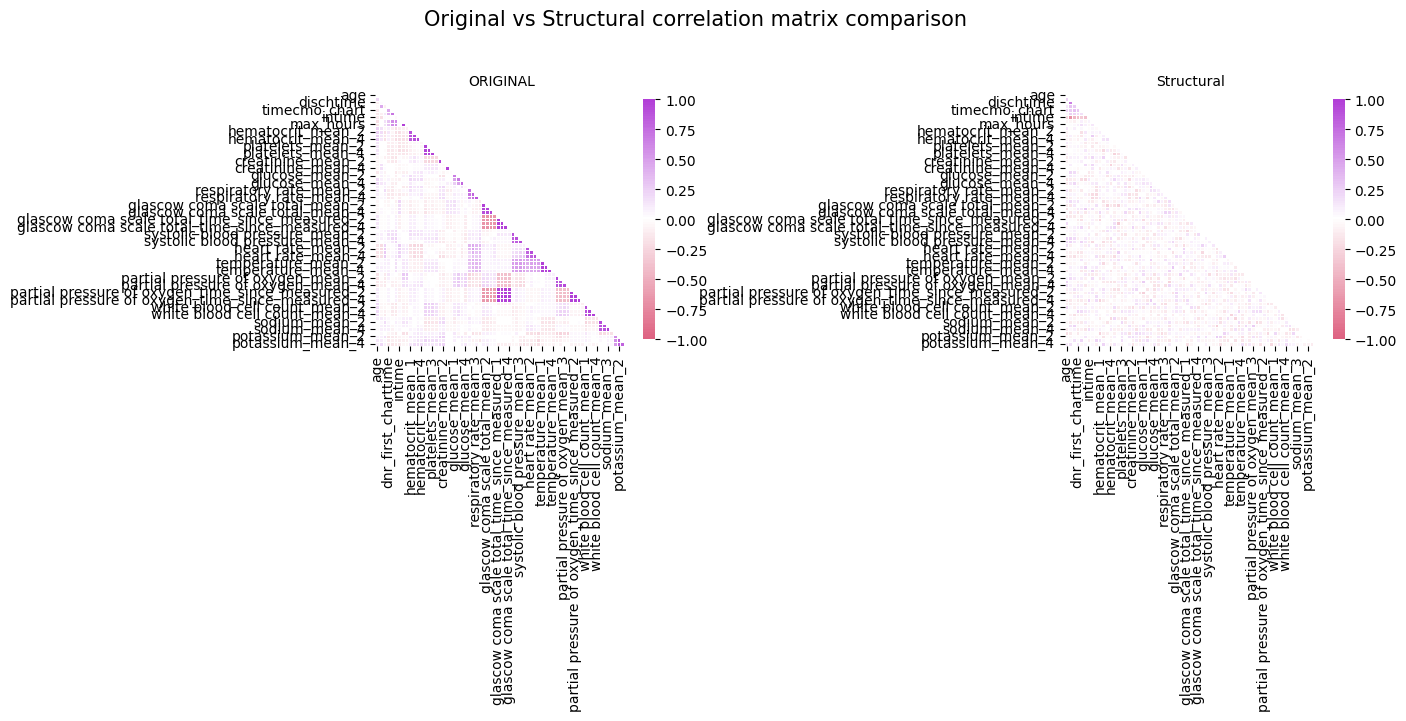

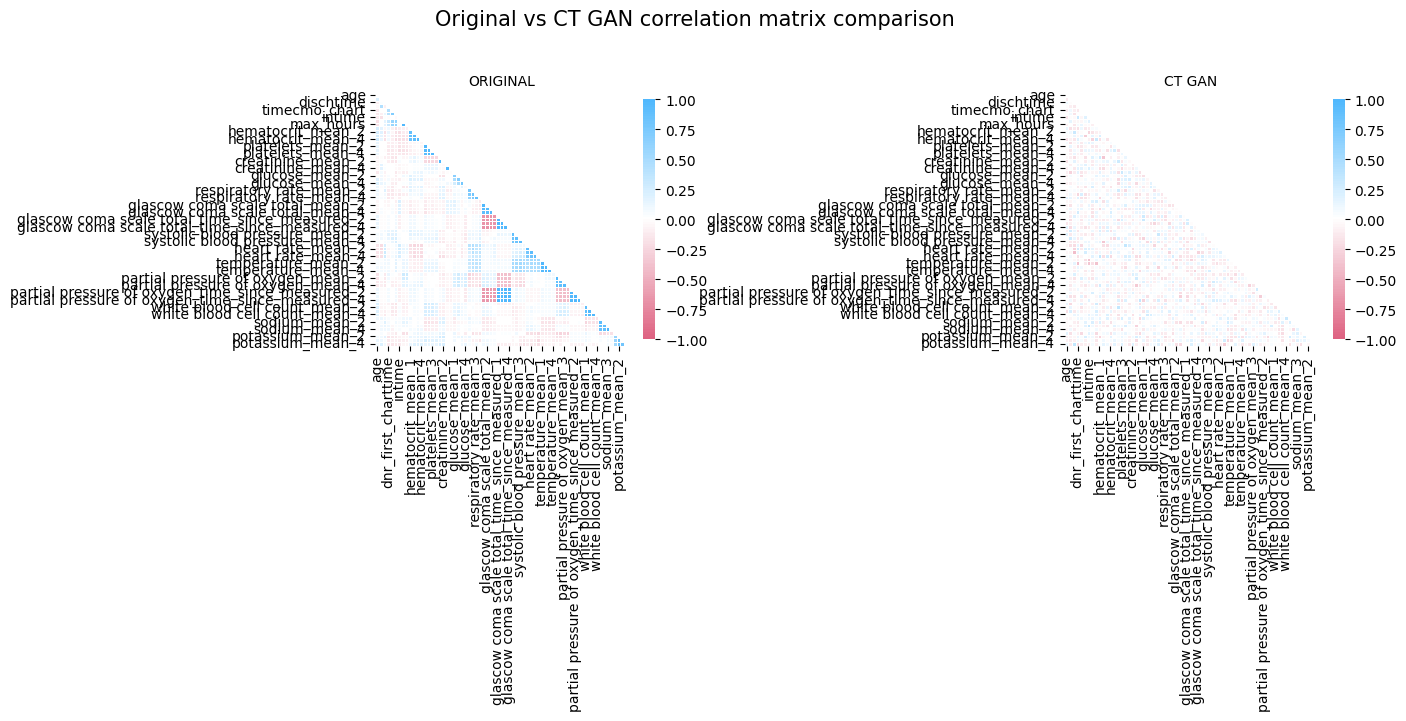

In [5]:
# Comparaison des matrices de corrélation entre données originales et méthode structurelle
corrplot_struct = correlation_plot(original.corr(), struct.corr(), difference=False, palette = DIVERGENT_STRUCT, name = 'Structural')
# Pourcentage de différence
_, mean = get_correlation_difference_ratio(original.corr(), struct.corr())
print(f"la différence moyenne de corrélation entre le jeu de données original et les données structural est de {mean}%")

# Comparaison des matrices de corrélation entre données originales et méthode Avatar
corrplot_avatar = correlation_plot(original.corr(), avatar.corr(), difference=False, name = 'Avatar')
# Pourcentage de différence
_, mean = get_correlation_difference_ratio(original.corr(), avatar.corr())
print(f"la différence moyenne de corrélation entre le jeu de données original et les données avatars est de {mean}%")

# Comparaison des matrices de corrélation entre données originales et méthode CT-GAN
corrplot_ctgan = correlation_plot(original.corr(), ct_gan.corr(), difference=False, palette = DIVERGENT_CTGAN, name = 'CT GAN')
# Pourcentage de différence
_, mean = get_correlation_difference_ratio(original.corr(), ct_gan.corr())
print(f"la différence moyenne de corrélation entre le jeu de données original et les données CT-GAN est de {mean}%")


#### Comparaison des projections

La dernière étape d'évaluation générique de l'utilité d'un jeu de données synthétique consiste à prendre en compte l'ensemble des variables en une seule fois.
Des méthodes de réduction de dimension permettent de transformer les individus en des coordonnées dans un nouvel espace réduit.

Dans ce notebook nous avons utilisé l'analyse factorielle de données mixtes (apparentée à l'analyse en composante principale) pour réaliser cette projection.
Chaque dimension est constituée d'une combinaison linéaire de l'ensemble des variables. Deux individus proches dans cet espace possèdent des valeurs semblables dans les données d'origine.

On peut ensuite comparer la projection des données originales à celles des données synthétiques.

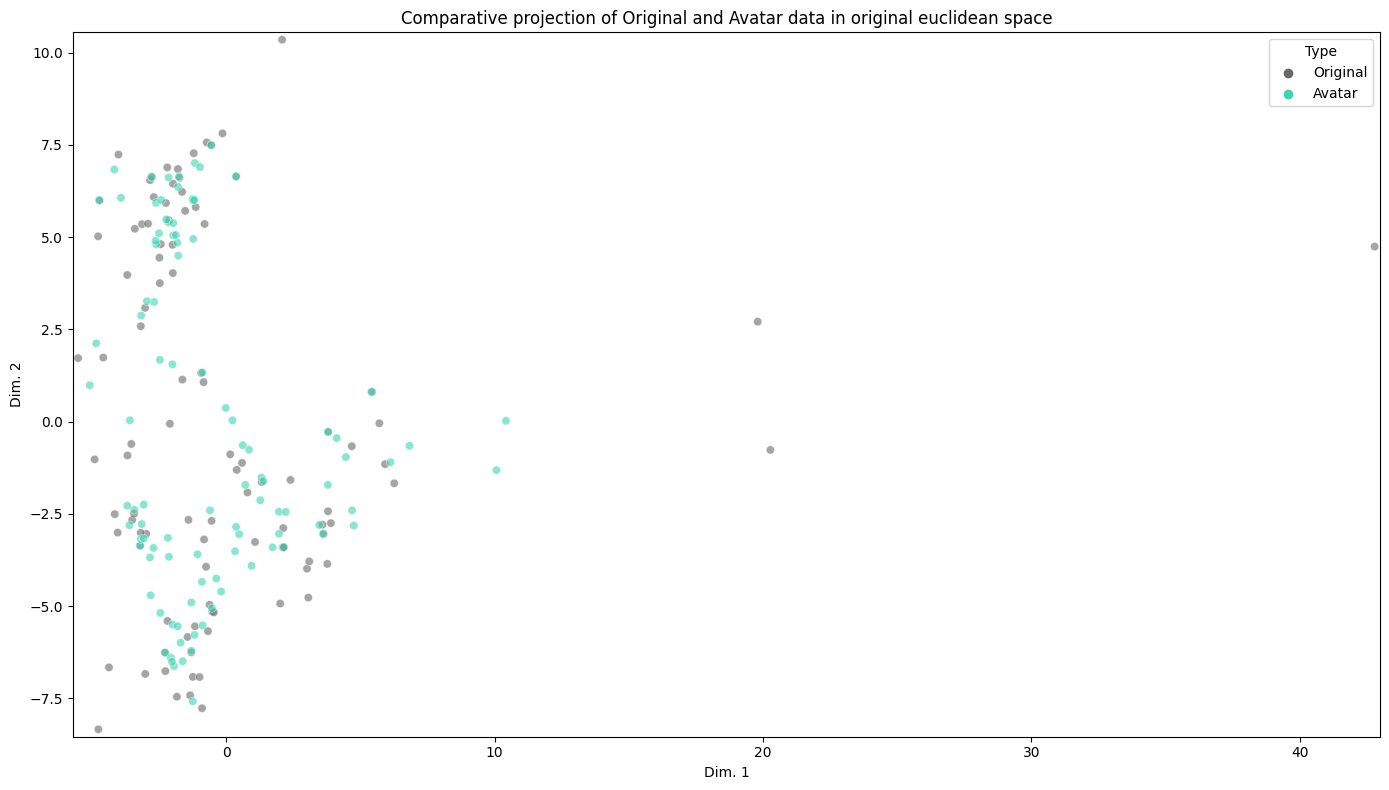

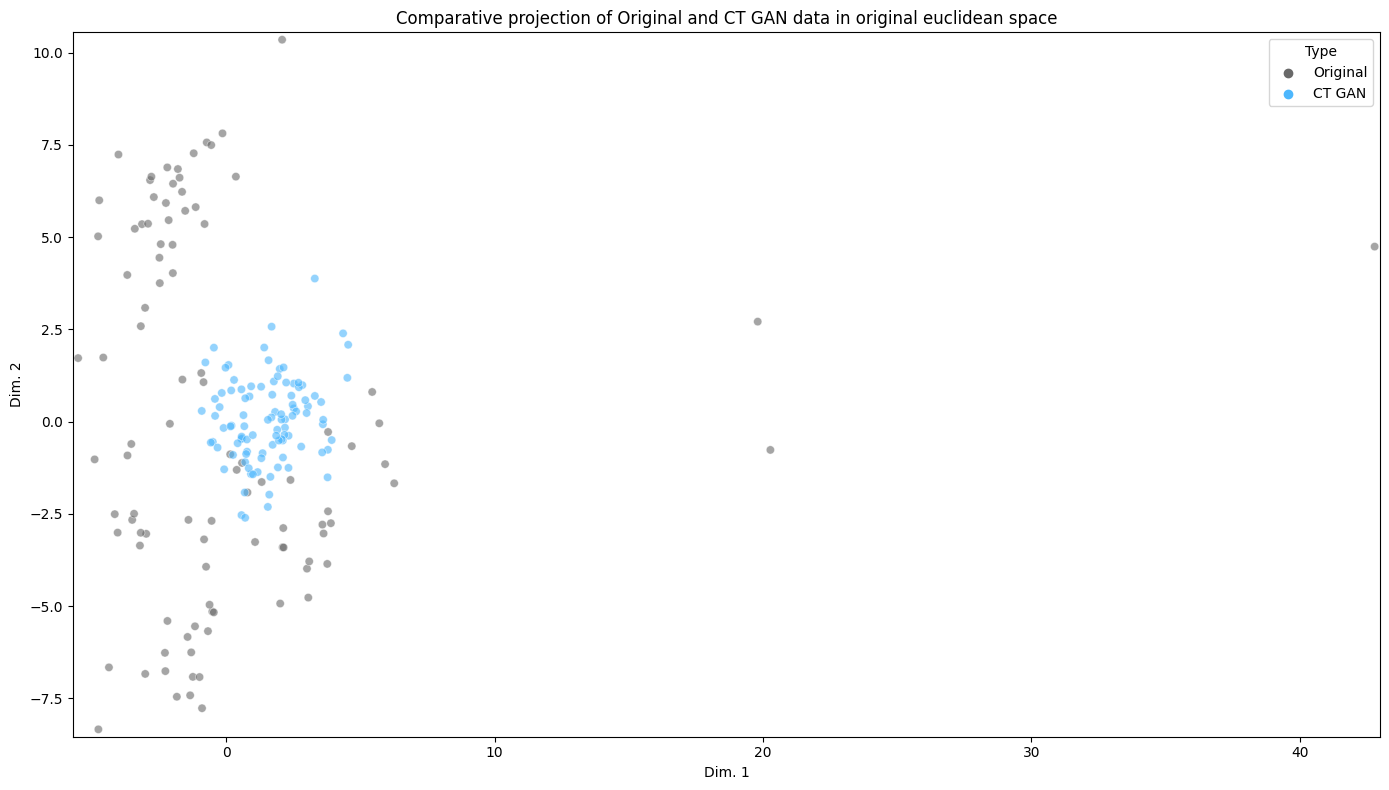

In [9]:
# Entrainement du modèle de projection sur les données originales
coord_original, model = saiph.fit_transform(original, nf = 3)

# Transformation des données synthétiques dans l'espace défini par les données originales
coord_avatar = saiph.transform(avatar, model)
coord_ct_gan = saiph.transform(ct_gan, model)
coord_struct = saiph.transform(struct, model)

# Visualisation des projections sur les 2 premières dimensions
projection_struct = plot_2d_projections(coord_original, coord_struct, synthetic_color=PRIMARY_STRUCT, name="Structural")
projection_avatars = plot_2d_projections(coord_original, coord_avatar, name="Avatar")
projection_ct_gan = plot_2d_projections(coord_original, coord_ct_gan, synthetic_color=PRIMARY_CT_GAN, name="CT GAN")

La superposition des nuages de points des données originales et Avatar et dans une moindre mesure CT-GAN indique une bonne conservation de la structure statistique générale des données sur l'ensemble des variables. En revanche, la méthode structurelle ne parvient pas à conserver cette utilité à l'échelle multimodale.

#### Comparaison spécifique à MIMIC III

Jusqu'à présent, nous avons évalué l'utilité des jeux de données synthétiques par le biais de métriques génériques et réutilisables pour n'importe quel cas d'usage.   
La dernière étape de l'évaluation consiste à comparer les résultats d'une étude spécifique au cas d'usage entre les données originales et synthétiques.   
Dans le cas des données MIMIC III, nous avons choisi la prédiction du décès lors de l'hospitalisation à l'aide d'un algorithme de Random Forest.   

À noter que la faible quantité d'individus dans le jeu d'entraînement ne permettra pas d'obtenir des résultats de prédiction satisfaisants.   
L'objectif est ici d'illustrer la démarche d'évaluation d'un jeu de données synthétique.

In [10]:
# Comparaison de la symétrie de la variable à prédire dans les différents jeux de données
print('####### ORIGINAL #######')
print(avatar['mort_hosp'].value_counts())
print('####### AVATAR #######')
print(avatar['mort_hosp'].value_counts())
print('####### CT-GAN #######')
print(ct_gan['mort_hosp'].value_counts())
print('####### Structural #######')
print(struct['mort_hosp'].value_counts())


####### ORIGINAL #######
0    70
1    29
Name: mort_hosp, dtype: int64
####### AVATAR #######
0    70
1    29
Name: mort_hosp, dtype: int64
####### CT-GAN #######
0    74
1    25
Name: mort_hosp, dtype: int64
####### Structural #######
1    68
0    32
Name: mort_hosp, dtype: int64


Pour l'ensemble des jeux de données, la distribution de la variable à prédire est similaire avec une proportion d'environ 70/30.

In [11]:
original_prediction = original.copy()
avatar_prediction = avatar.copy()
ct_gan_prediction = ct_gan.copy()
struct_prediction = struct.copy()

original_prediction['mort_hosp'] = original_prediction['mort_hosp'].astype(int)
struct_prediction['mort_hosp'] = struct_prediction['mort_hosp'].astype(int)
avatar_prediction['mort_hosp'] = avatar_prediction['mort_hosp'].astype(int)
ct_gan_prediction['mort_hosp'] = ct_gan_prediction['mort_hosp'].astype(int)


# On supprime les variables indiquant la présence de données manquantes (_?) et les variables trop corrélées à la variable à prédire
drop_columns = ["mort_icu", "deathtime", "discharge_location", "fullcode_first_?", "dnr_first_?", "fullcode_?", 
    "dnr_?", "dnr_first_charttime_?", "timecmo_chart_?", "cmo_first_?", "cmo_last_?", "cmo_?", "deathtime_?", "hospital_expire_flag"]
    
# Application du pipeline de prédiction
original_prediction = original_prediction.drop(columns=drop_columns)
avatar_prediction = avatar_prediction.drop(columns=drop_columns)
ct_gan_prediction = ct_gan_prediction.drop(columns=drop_columns)
struct_prediction = struct_prediction.drop(columns=drop_columns)

Les figures suivantes sont obtenues par bootstrap: on découpe plusieurs fois, de façon aléatoire, le jeu de données en jeu d'entraînement et de test, puis on calcule les performances sur le jeu de test du classifieur (AUC, f1-score, accuracy) entraîné sur le jeu d'entraînement. 

<AxesSubplot:xlabel='auc', ylabel='method'>

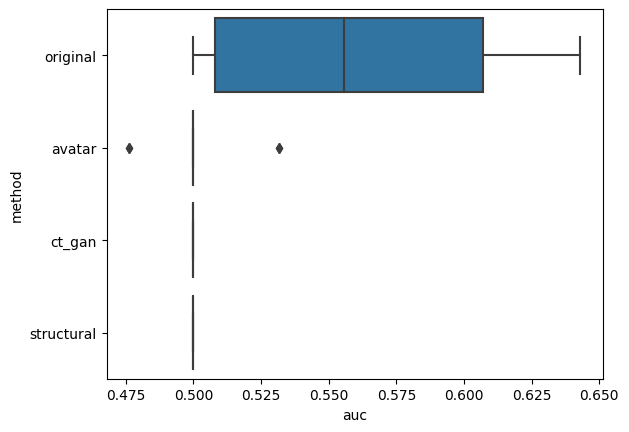

In [12]:
comparative_results, confusion_matrices = compare_mortality_predictions(original_prediction, avatar_prediction, ct_gan_prediction, struct_prediction)
sns.boxplot(data=comparative_results, x="auc", y="method")

<AxesSubplot:xlabel='f1_score', ylabel='method'>

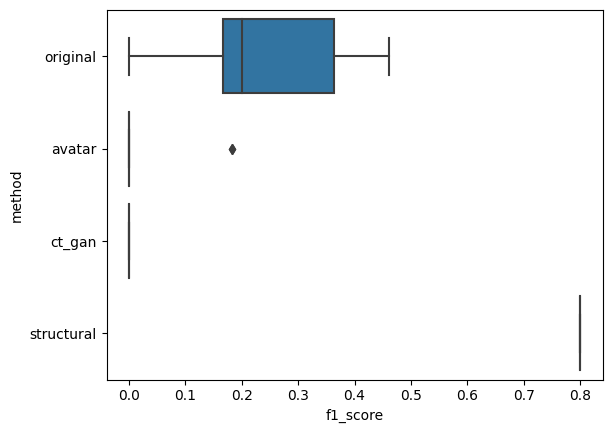

In [13]:
sns.boxplot(data=comparative_results, x="f1_score", y="method")

<AxesSubplot:xlabel='accuracy', ylabel='method'>

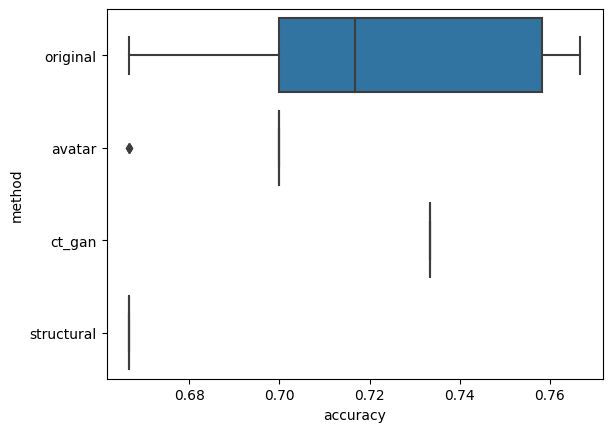

In [14]:
sns.boxplot(data=comparative_results, x="accuracy", y="method")

Comme attendu avec un faible jeu d'entraînement, cette analyse ne permet pas de statuer sur la conservation du potentiel prédictif d'un jeu de données synthétiques, compte tenu du fait que les données originales elles-mêmes ne sont pas prédictives.   
Toutefois, cette évaluation illustre l'intérêt d'évaluer l'utilité d'un jeu de données synthétiques sur des métriques spécifiques au cas d'usage.    
Il convient de noter que les 4 jeux de données sont passés par le même pipeline pour fournir les résultats de prédiction. Cette caractéristique permet de vérifier que les jeux de données synthétiques sont structurellement compatibles avec les données d'origine.   

###  C. Évaluation de la confidentialité

Les données synthétiques n'étant pas des données réelles, on considère parfois à tort qu'elles sont anonymes par défaut et qu'elles peuvent être utilisées pour n'importe quel usage.    
Les données synthétiques peuvent en effet apporter de la confidentialité, toutefois, de nombreux exemples ont démontré que des individus pouvaient être ré-identifiés à partir de données de synthèse.   
Pour être considérées comme anonymes, les données synthétiques doivent pouvoir respecter les 3 critères de confidentialité identifiés par le comité européen sur la protection des données (CEPD) :
- individualisation
- corrélation
- inférence   

ou bien satisfaire une analyse de risque de réidentification concluant à un niveau de risque suffisamment faible.

#### Métriques génériques

La vérification de ces trois critères sur des données synthétiques n'est pas un processus trivial et fait l'objet d'une littérature restreinte à ce jour.   
Deux métriques identifiées pour évaluer la confidentialité de n'importe quel jeu de données synthétique sont le **DCR** (Distance to Closest Record) et le **NNDR** (Nearest Neighbor Distance Ratio).     

Le DCR est la distance au plus proche voisin parmi les données réelles. Plus le DCR est élevé, plus le jeu de données est jugé confidentiel, car les données synthétiques sont très éloignées des données originales.    
Le NNDR est le ratio entre la distance au plus proche voisin et celle au deuxième plus proche voisin parmi les données réelles. Pour le NNDR, une valeur de 1 témoigne du fait qu'il n'existe pas de paire (donnée synthétique, donnée réelle) dont les composantes sont à la fois proches entre elles et isolée du reste.   
Ces deux métriques doivent être interprétées conjointement. Par exemple, un jeu de données avec un DCR à 0 peut être jugé satisfaisant si le NNDR est à 1 (cas ou des individus identiques sont retrouvés plusieurs fois dans les données originales et synthétiques).

Nous avons d'abord calculé ces deux métriques sur les trois jeux de données synthétiques et comparé les résultats.     
Les distributions sur les données originales ont été obtenues via la séparation du jeu de données original en deux parties.


In [15]:
# Récupération des coordonnées originales et synthétiques pour le calcul du DCR et du NNDR dans un espace euclidien 
coord_original, model = saiph.fit_transform(original, nf = 5)
coord_avatar = saiph.transform(avatar, model) 
coord_ct_gan = saiph.transform(ct_gan, model)
coord_struct = saiph.transform(struct, model)

coord = {'avatar': coord_avatar, 'structural': coord_struct, 'ct_gan': coord_ct_gan}

distances_df = compute_distance_metrics(coord_original, coord)

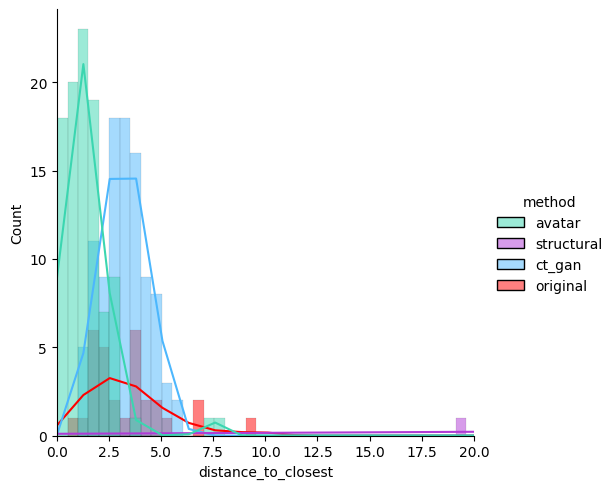

In [16]:
# visualisation de la distribution des valeurs de DCR
sns.displot(data=distances_df, x='distance_to_closest',hue = 'method', kde=True, bins= 500, 
palette=dict(avatar=PRIMARY_GREEN, ct_gan=PRIMARY_CT_GAN, structural=PRIMARY_STRUCT, original='red'), ).set(xlim=(0, 20))
plt.show()


# visualisation de la distribution des valeurs de NNDR
sns.displot(data=distances_df,  x='closest_distance_ratio',hue = 'method', kde=True,  bins= 50, 
palette=dict(avatar=PRIMARY_GREEN, ct_gan=PRIMARY_CT_GAN, structural=PRIMARY_STRUCT,  original='red'))
plt.show()


Au regard de ces deux métriques, la méthode structurelle semble apporter plus de garantie de confidentialité que les méthodes Avatar et CT-GAN. Ces résultats coïncident avec les analyses d'utilité réalisées précédemment et illustrent le principe de compromis utilité/confidentialité qu'il convient de prendre en compte pour chaque cas d'usage.   
Le DCR et NNDR sont des indicateurs intéressants d'évaluation de la confidentialité d'un jeu de données synthétiques, mais ils ne sont pas suffisants pour statuer sur le caractère anonyme des données synthétiques. En effet, ils permettent principalement d'évaluer la quantité de points aberrants (ou *outliers*) qui seraient proches de certains individus des données réelles, qui sont de surcroît les plus identifiables.

#### Métriques de confidentialité spécifiques à l'avatarisation
Le caractère "individu-centrique" de la méthode avatar a permis de développer de nouvelles métriques d'évaluation de la confidentialité. Durant l'avarisation, le lien qui unit une donnée originale à son avatar est connu. Bien que définitivement et irréversiblement supprimé à l'issue du processus, ce lien a permis le développement de nouvelles métriques basées sur chacun des trois critères du CEPD.   
Une description plus détaillée de chacune de ces métriques est disponible sur une [documentation publique](https://docs.octopize.io/docs/understanding/Privacy).   

- *Hidden rate* et *Local cloaking* permettent d'évaluer le critère **d'individualisation**
- *Correlation protection rate* permet d'évaluer le critère de **corrélation**
- *Inference rate* permet d'évaluer le critère **d'inférence** sur des variables continues comme sur des catégorielles

A titre indicatif, les cibles à atteindre pour chacune des métriques (telles que pratiquées par Octopize) sont décrites ci-dessous :
- *Hidden rate* et *Local cloaking* : 90% et 5
- *Correlation protection rate*: 95%
- *Inference rate*: <90% pour une variable catégorielle et >10% pour une variable continue.

In [17]:
metrics = PrivacyMetrics()

metrics.fit(original, avatar, nf=5)
print("The hidden rate is {}".format(metrics.hidden_rate))
print("The median local cloaking is {}".format(metrics.local_cloaking.avatars_median))

cpr = metrics.correlation_protection_rate(
    ["gender", "age", "mort_hosp"]
)
print("The correlation protection rate is {}".format(cpr))

# Valeur cible catégorielle
inf_cat = metrics.inference_metrics(
    ["gender", "age", "mort_hosp"],
    target="insurance",
).accuracy
print(
    f"The risk of good inference of target knowing variables specified in list is {inf_cat}"
)

# Valeur cible continue
inf_cont = metrics.inference_metrics(
    ["gender", "age", "mort_hosp"],
    target="los_icu",
).SMAPE
print(
    f"In average, infered value differs from real at {inf_cont:.2f}%"
)

The hidden rate is 90.9090909090909
The median local cloaking is 4.0
The correlation protection rate is 98.98989898989899
The risk of good inference of target knowing variables specified in list is 0.7575757575757576
In average, infered value differs from real at 80.60%


À l'aide de ces différentes métriques, il est possible de corroborer le caractère anonyme des données synthétiques générées par la méthode Avatar, dans le sens où elles proposent une mesure pour les trois critères du G29 exposés plus haut.

On peut d'ailleurs illustrer cette protection en visualisant la transformation effectuée par un individu pour devenir un avatar. Les individus les plus à risque étant les outliers, il est intéressant de visualiser la transformation dont ils ont fait l'objet.

In [18]:
# Visualisation de la transformation d'un individu spécifique en avatar (cas d'un individu statistiquement marginal)
travel_plot = individual_travel_plot(original, avatar, indiv = 24)

Le lien qui unit un individu à son avatar est utilisé pour calculer des métriques de confidentialité puis est définitivement détruit à la fin du processus d'anonymisation. Il est ici conservé dans un but pédagogique pour illustrer la protection apportée en particulier vis à vis des individus remarquables. La méthode Avatar protège ces individus uniques en les recentrant. 

#### Remarque

Lorsque la génération de données de synthèse est utilisée dans l'objectif de préserver la confidentialité des individus tout en conservant l'utilité des informations statistiques, le contexte d'utilisation des données générées doit être pris en compte. Une balance entre utilité et confidentialité doit être appliquée de façon adaptée pour chaque cas d'usage.
Pour des méthodes utilisant le deep learning comme pour l'avatarisation, il est préférable de travailler sur des cohortes plus importantes, car un niveau élevé de confidentialité peut être atteint en fournissant moins de dérivations sur les propriétés statistiques originales.

## Conclusion

En guise de conclusion, établissons un tableau présentant les avantages et les inconvénients de chaque méthode: 

||Structurel|Avatar|GAN|
|--|--|--|--|
|Nécessite l'accès aux données|Non, uniquement du schéma formel|Oui|Oui|
|Volume de données nécessaire|Aucun|>50 conseillé|Elevé|
|Permet de produire des données anonymes|Oui|Oui|Oui, mais difficile en pratique|
|Conserve l'utilité des données|Non|Oui|Oui, sous réserve d'avoir suffisamment de données d'entraînement|
|Difficulté d'entraînement|Aucune|Faible|Elevée|


## Bibliographie


(1) [Azizi et al., Can synthetic data  be a proxy for real patient data? A validation study (BMJ, 2019)](https://bmjopen.bmj.com/content/11/4/e043497.abstract)   
(2) [Benaim et al, Analyzing medical research results based on synthetic data and their relation to real data results (JMIR, 2020)](https://medinform.jmir.org/2020/2/e16492)   
(3) [Foraker et al., Spot the difference: comparing results of analyses from real patient data and synthetic derivatives (JamiaOpen, 2020)](https://academic.oup.com/jamiaopen/article/3/4/557/6032922?login=false)   
(4) [McKenna et al., Winning the NIST Contest: A scalable and general approach to differentially private synthetic data (Journal of Privacy and Confidentiality, 2021)](https://arxiv.org/pdf/2108.04978.pdf)   
(5) [Kaur et al., Application of Bayesian networks to generate synthetic health data (JAMIA, 2021)](https://pubmed.ncbi.nlm.nih.gov/33367620/)   
(6) [Goodfellow et al., Generative Adversarial Networks (NeurIPS, 2014)](https://arxiv.org/pdf/1406.2661.pdf)    
(7) [Choi et al., Generating Multi-label Discrete Patient Records using Generative Adversarial Networks (Machine Learning for Healthcare, 2017)](https://arxiv.org/pdf/1703.06490.pdf)   
(8) [Van der Schaar et al., Time series generative adversarial network (NeurIPS, 2019)](https://papers.nips.cc/paper/2019/hash/c9efe5f26cd17ba6216bbe2a7d26d490-Abstract.html)   
(9) [Ramesh et al., Hierarchical Text-Conditional Image Generation with CLIP Latents (arXiv preprint, 2022)](https://arxiv.org/pdf/2204.06125.pdf)   
(10) [Brown et al., Language models are few-shots learners (NeurIPS, 2020)](https://arxiv.org/pdf/2005.14165.pdf)   
(11) [Le Scao et al., BLOOM: A 176B-Parameter Open-Access Multilingual Language Model (arXiv preprint 2022)](https://arxiv.org/abs/2211.05100.pdf)   
(12) [Xu et al., Modeling Tabular data using Conditional GAN (NeurIPS, 2019)](https://github.com/sdv-dev/CTGAN)   
(13) [Meng et al., Interpretability and fairness evaluation of deep learning models on MIMIC-IV dataset (Sci Rep2022)](https://www.nature.com/articles/s41598-022-11012-2)   
(14) [Zhang et al.,  Membership inference attacks against synthetic health data (Journal of Biomedical Informatics, 2021)](https://pubmed.ncbi.nlm.nih.gov/34920126/)   
(15) [Carvalho et al., Survey on Privacy-Preserving Techniques for Data Publishing (preprint)](https://arxiv.org/pdf/2201.08120)   
(16) [Guillaudeux, M., Rousseau, O., Petot, J. et al. Patient-centric synthetic data generation, no reason to risk re-identification in biomedical data analysis. npj Digit. Med. 6, 37 (2023)](https://doi.org/10.1038/s41746-023-00771-5)